## Notebook that takes dihadron ntuples and plots kinematics distributions also with MC

In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time

import root_pandas as rpd
from root_pandas import read_root

mpl.rcParams['figure.figsize'] = 6.2,3.5
mpl.rcParams['axes.labelsize'] = 17
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize']= 13

Welcome to JupyROOT 6.15/01


In [69]:
df = {}
df['Pb']= read_root('Pairs_Pb.root', 'Pb')
df['Pb_mix'] = read_root('Pairs_Pb.root', 'Pb_mix')
df['Pb_trigger'] = read_root('Pairs_Pb.root', 'Pb_trigger')
df['D_Pb']= read_root('Pairs_Pb.root', 'D_Pb')
df['D_Pb_mix'] = read_root('Pairs_Pb.root', 'D_Pb_mix')
df['D_Pb_trigger'] = read_root('Pairs_Pb.root', 'D_Pb_trigger')

#df['Fe']= read_root('Pairs_Fe.root', 'Fe')
#df['Fe_mix'] = read_root('Pairs_Fe.root', 'Fe_mix')
#df['Fe_trigger'] = read_root('Pairs_Fe.root', 'Fe_trigger')
#df['D_Fe']= read_root('Pairs_Fe.root', 'D_Fe')
#df['D_Fe_mix'] = read_root('Pairs_Fe.root', 'D_Fe_mix')
#df['D_Fe_trigger'] = read_root('Pairs_Fe.root', 'D_Fe_trigger')

#df['C']= read_root('Pairs_C.root', 'C')
#df['C_mix'] = read_root('Pairs_C.root', 'C_mix')
#df['C_trigger'] = read_root('Pairs_C.root', 'C_trigger')
#df['D_C']= read_root('Pairs_C.root', 'D_C')
#df['D_C_mix'] = read_root('Pairs_C.root', 'D_C_mix')
#df['D_C_trigger'] = read_root('Pairs_C.root', 'D_C_trigger')

#df['D'] = pd.concat([df['D_Pb'],df['D_Fe'],df['D_C']]) #simply combine the deuterium results for all targets
#df['D_mix'] = pd.concat([df['D_Pb_mix'],df['D_Fe_mix'],df['D_C_mix']]) #simply combine the deuterium results for all targets
#df['D_trigger'] = pd.concat([df['D_Pb_trigger'],df['D_Fe_trigger'],df['D_C_trigger']]) #simply combine the deuterium results for all targets


In [68]:
def applyCut(inputDataframe, cut, text=None):
    nbeforecut = inputDataframe.shape[0]
    cutDataframe = inputDataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' (%2.2f '%(100.0*cutDataframe.shape[0]/nbeforecut), '%)'
    return cutDataframe
def applyCuts(fullDataframe,name='default',isMC=False): 
    dataframe = fullDataframe
    print 'Entries before cut ', dataframe.shape[0]
    dataframe.eval('inelasticity = Nu/5.014', inplace=True)
    
    dataframe = applyCut(dataframe, 'Q2>1.0', 'Q2>1.0 :')
    #dataframe = applyCut(dataframe, 'W>2.0', 'W>2.0 :')
    dataframe = applyCut(dataframe, 'z>0.5', 'z>0.5 :')
    dataframe = applyCut(dataframe, 'inelasticity < 0.80','inelasticity < 0.80')
    return dataframe


In [ ]:
#apply cuts

In [70]:
for key in ['Pb']:
    print key
    df[key] = applyCuts(df[key])

Pb
Entries before cut  470634
Q2>1.0 : 470634  (100.00  %)
z>0.5 : 10920  (2.32  %)
inelasticity < 0.80 9194  (84.19  %)


## Event Variables

In [58]:
def plotEventVariables(df):
    fig = plt.figure( figsize=(20, 10))
    plt.subplot(2,3,1)
    plt.hist(df['Nu'], bins=25,range =(2,5), histtype='step', normed=True,label='Data')
    plt.legend()
    plt.xlabel("Nu [GeV]", fontsize=20)

    plt.subplot(2,3,2)
    plt.hist(df['Q2'], bins=25,range =(1,5), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['Q2'], bins=25,range = (1,5),  normed = True,alpha=0.2,label='MC')
    plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=20)

    #plt.subplot(2,3,3)
    #plt.hist(df['W'], bins=25,range =(1,3), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['W'], bins=25,range = (1,3), normed = True,alpha=0.2,label='MC')
    #plt.xlabel("$W$ [GeV]", fontsize=20)

    plt.subplot(2,3,4)
    plt.hist(df['Xb'], bins=25,range =(0,1), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['Xb'], bins=25,range = (0,1),  normed = True,alpha=0.2,label='MC')
    plt.xlabel("$x$", fontsize=20)
    
    plt.subplot(2,3,5)
    plt.hist(df['inelasticity'], bins=25,range =(0,1), histtype='step', normed=True,label='Data')
    plt.legend()
    plt.xlabel("inelasticity", fontsize=20)
    plt.axvline(x=.850,color='red',linestyle='--')


    #plt.subplot(2,3,5)
    #plt.hist(df['SectorEl'], bins = 12, range = (-0.5,5.5),histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['SectorEl'], bins = 12, range=(-0.5,5.5), normed = True,alpha=0.2,label='MC')
    #plt.xlabel('Sector El')

    #plt.subplot(2,3,6)
    #plt.hist(df['deltaZ'], bins = 100, range=(-50,50), histtype='step', normed=True,label='Data')
    #plt.hist(MC_reco['deltaZ'], bins = 100, range=(-50,50), normed = True,alpha=0.2,label='MC')
    #plt.xlabel('Delta z')
    #plt.show()
    
    return

## Hadron Variables

In [50]:
def plotHadronVariables(df):
    fig = plt.figure( figsize=(12, 12))
    plt.subplot(3,3,1)
    plt.hist(df['xf'], bins=25,range=(-1,1), histtype='step', normed=True,label='xf_1')
    plt.hist(df['xf_asso'], bins=25,range=(-1,1), histtype='step', normed=True,label='xf_2')
    plt.legend(loc='best', frameon=False)
    plt.xlabel("$X_{\mathrm{f}}$", fontsize=14)

    plt.subplot(3,3,2)
    plt.hist(df['z'], bins=25,range =(0,1), histtype='step', normed=True,label='z1')
    plt.hist(df['z_asso'], bins=25,range =(0,1), histtype='step', normed=True,label='z2')
    plt.xlabel("$z_{\mathrm{h}}$", fontsize=14)
    
    plt.subplot(3,3,3)
    plt.hist(df['y'], range=(-4,4), bins = 50,histtype='step', normed=True,label='y1')
    plt.hist(df['y_asso'], range=(-4,4), bins = 50,histtype='step', normed=True,label='y2')
    plt.xlabel("rapidity", fontsize=14)
    plt.legend()
    
    plt.subplot(3,3,4)
    plt.hist(df['phi_pq'], bins=25, histtype='step', normed=True,label='phi1')
    plt.hist(df['phi_pq_asso'], bins=25, histtype='step', normed=True,label='phi2')
    plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=14)
    plt.legend()
    
    plt.subplot(3,3,5)
    plt.hist(df['mass'], bins=25, histtype='step', range=(0,2.0),normed=True)
    plt.xlabel("mass [GeV]", fontsize=14)

    plt.subplot(3,3,6)
    plt.hist(df['missing_mass'], bins=25, histtype='step', range=(0,2.0),normed=True)
    plt.xlabel("missing mass [GeV]", fontsize=14)
    
    plt.subplot(3,3,7)
    plt.hist(df['dy'], bins=50, histtype='step', range=(-3.5,3.5),normed=True)
    plt.xlabel("delta-rapidity", fontsize=14)
    
    
    plt.subplot(3,3,8)
    plt.hist(df['dphi'], bins=20, histtype='step',normed=True)
    plt.xlabel("dphi", fontsize=14)
    
    
    plt.subplot(3,3,9)
    plt.hist(df['dipion_pt'], bins=50, histtype='step',range=(0.0,2.0),normed=True, label='dipion pt')
    plt.hist(df['t'], bins=50, histtype='step',range=(0.0,2.0),normed=True,label='t')

    plt.xlabel("dipion_pt", fontsize=14)


    plt.show()
    return 

## Dihadron variables

## 2D Distributions

In [ ]:
fig = plt.figure( figsize=(12, 12))
plt.subplot(3,3,1)
plt.hexbin(data['Pt'],data['Zh'],bins='log',cmap='viridis')
plt.xlabel("$p_{\mathrm{T}}$ [GeV]", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,2)
plt.hexbin(data['Q2'],data['Xb'],gridsize=50, bins='log',cmap='viridis')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=14)
plt.ylabel("$X_{b}$", fontsize=14)

plt.subplot(3,3,3)
plt.hexbin(data['Q2'],data['Nu'],gridsize=50,bins='log',cmap='viridis')
plt.xlabel("$Q^{2} [GeV^{2}]$", fontsize=14)
plt.ylabel("$Nu$ ", fontsize=14)

plt.subplot(3,3,4)
plt.hexbin(data.query('Zh<1.0')['PhiPQ'],data.query('Zh<1.0')['Zh'],bins='log',cmap='viridis')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,5)
plt.hexbin(data.query('Pt<1.5')['PhiPQ'],data.query('Pt<1.5')['Pt'],bins='log',cmap='viridis')
plt.xlabel("$\phi_{pq}$ [\circ]", fontsize=20)
plt.ylabel("$p_{\mathrm{T}}$ [GeV]", fontsize=20)

plt.subplot(3,3,6)
plt.hexbin(data.query('Zh<1.0 and Xf>-1.0')['Xf'],data.query('Zh<1.0 and Xf>-1.0')['Zh'],bins='log',cmap='viridis')
plt.xlabel("X_{F}", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,7)
plt.hexbin(data.query('Zh<1.0 and y>-4')['y'],data.query('Zh<1.0 and y>-4')['Zh'],bins='log',cmap='viridis')
plt.xlabel("Rapidity", fontsize=14)
plt.ylabel("$z_{\mathrm{h}}$ ", fontsize=14)

plt.subplot(3,3,8)
plt.hexbin(data.query('abs(Xf)<1.0 and y>-4')['y'],data.query('abs(Xf)<1.0 and y>-4')['Xf'],bins='log',cmap='viridis')
plt.xlabel("Rapidity", fontsize=14)
plt.ylabel("X_{F}", fontsize=14)


plt.show()

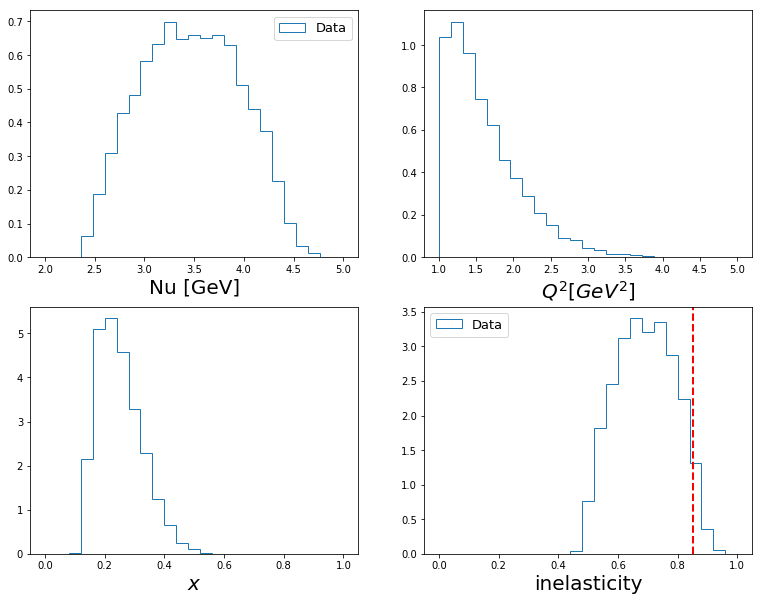

In [59]:
plotEventVariables(df['Pb'])


In [16]:
df['Pb'].head()



,Nu,Q2,Xb,dipion_pt,dphi,dy,mass,missing_mass,phi_pq,phi_pq_asso,...,pid_asso,t,u,xf,xf_asso,y,y_asso,y_star,z,z_asso
42,3.663211,1.614811,0.234910,0.403655,0.309819,0.237864,0.292044,1.474685,-1.867758,-2.177577,...,211,0.829680,1.654236,0.319164,0.203544,2.418741,2.180876,1.188384,0.410388,0.280462
66,2.755150,1.344208,0.259993,0.281854,2.548473,0.232499,0.875773,0.876162,2.342740,-1.391973,...,-211,0.333496,3.357759,0.286801,0.242360,1.845912,1.613412,0.720687,0.466954,0.490228
67,2.755150,1.344208,0.259993,0.281854,2.548473,-0.232499,0.875773,0.876162,-1.391973,2.342740,...,211,0.333496,3.357759,0.242360,0.286801,1.613412,1.845912,0.488187,0.490228,0.466954
72,2.929695,1.513593,0.275314,0.328766,2.212400,0.725551,0.769407,1.078895,2.714442,0.502042,...,211,0.669144,3.030312,0.380175,0.069979,2.084287,1.358737,0.922699,0.551269,0.275278
126,4.309378,1.797300,0.222253,0.164371,2.669166,1.264960,0.896089,1.493518,-2.866092,0.747927,...,-211,1.005755,0.442027,0.436211,-0.014247,2.507670,1.242711,1.214069,0.545376,0.163135


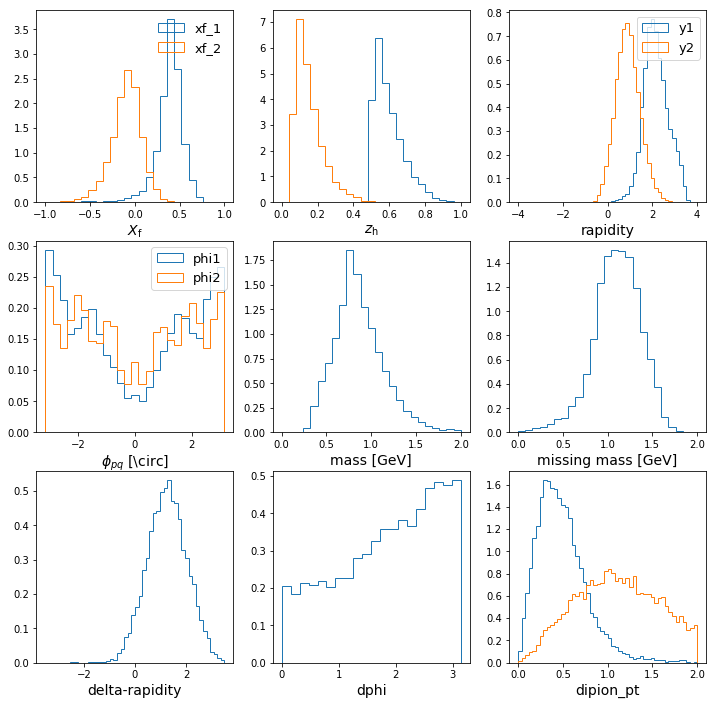

In [51]:
plotHadronVariables(df['Pb'])